# Part 2: The awesome NetworkX library

## Follow the tutorial

In [34]:
import networkx as nx

# Create an empty graphs with no node and no edges
G = nx.Graph()

# Add single node
#G.add_node(1)

# Add nbunch of nodes
H = nx.path_graph(10)
G.add_nodes_from(H)

# Add edges one at a time
#G.add_edge(1,2)

# Add ebunch edges
G.add_edges_from([(1,2),(1,3)])

In [35]:
# Get number of nodes
print "Number of nodes:"
G.number_of_nodes()

Number of nodes:


10

In [36]:
# Get number of edges
print "Number of edges:"
G.number_of_edges()

Number of edges:


2

In [37]:
# Get nodes
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
# Get edges
G.edges()

[(1, 2), (1, 3)]

In [39]:
# Get neighbors
G.neighbors(1)

[2, 3]

In [45]:
# Get data structure
G[1]

{2: {}, 3: {}}

In [49]:
# Fast examination using iterators
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [50]:
# Get access to edges
for (u,v,d) in FG.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

(4, 3, 0.125)
(4, 3, 0.375)


In [51]:
# Add graph attribute
G.graph['day']='Sunday'
G.graph

{'day': 'Sunday'}

In [53]:
# Add node attribute
G.add_node(1, time = '5pm')
G.node[1]

{'time': '5pm'}

In [55]:
# Add edge attribute
G.add_edge(1, 2, weight=4.7)
G.edge[1][2]

{'weight': 4.7}

In [66]:
# Get connected components
nx.connected_components(G)

<generator object connected_components at 0x000000000961CEA0>

In [67]:
# Sort by value
sorted(nx.degree(G).values())

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2]

In [48]:
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

## Homework on section 2.12

### **Exercise 2.1: The Königsberg Problem**

Euler states that it is not possible to do so if *a graph has more than two nodes with odd number of links*. In order words, if the figures have two nodes with an odd number of links, they can function as the start and end points. As such, the solution for each figure is:

* Figure (a) has 5 links and 4 nodes, two of which (left and right) have an odd number of links. Thus, this **is** solvable only from the left or right as start/end points.
* Figure (b) has 8 links and 5 nodes, four of which (top, buttom, left, right) have an odd number of links. Thus, this is **not** solvable.
* Figure (c) has 18 links and 12 nodes, all of which has an even number of links. Thus, this **is** solvable.
* Figure (d) has 10 links and 6 nodes, two of which (rightmost nodes) has an odd number of links. Thus, this **is** solvable.


### **Exercise 2.3: Graph Representation**

There are two graphs:
* Figure (a) is an undirected graph of 6 nodes and 7 links
* Figure (b) is a directed graph of 6 nodes and 8 directed links

These can be represtented as:

In [74]:
import networkx as nx

# Graph (a)
aG = nx.Graph()
edgesA = [(1,2), (1,3), (1,4), (1,6), (2,3), (2,4), (3,6)]
aG.add_nodes_from([1, 2, 3, 4, 5, 6]) 
aG.add_edges_from(edgesA)

# Graph (b)
bG = nx.DiGraph()
edgesB = [(1,2), (2,3), (2,4), (3,1), (3,2), (4,1), (6,1), (6,3)]
bG.add_nodes_from([1, 2, 3, 4, 5, 6]) 
bG.add_edges_from(edgesB)

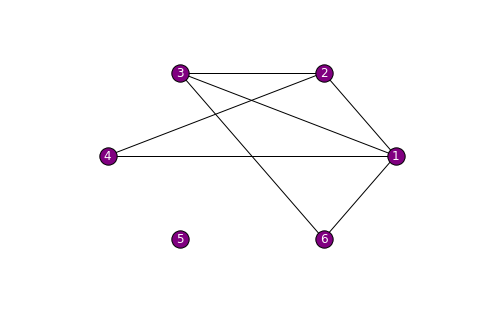

In [112]:
# Plotting graph (a)
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw_circular(aG, node_color='purple', with_labels=True, font_color='white')
plt.show()

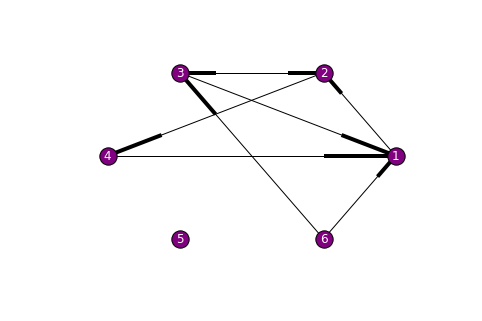

In [114]:
# Plotting graph (b)
nx.draw_circular(bG, node_color='purple', with_labels=True, font_color='white')
plt.show()

**a) Adjacency matrices**

In [125]:
# Get adjacency matrix for (a)
aAM = nx.adjacency_matrix(aG)
print "Adjacency matrix for (a)\n\n", aAM.todense()

print

# Get adjacency matrix for (b)
bAM = nx.adjacency_matrix(bG)
print "Adjacency matrix for (b)\n\n", bAM.todense()

Adjacency matrix for (a)

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Adjacency matrix for (b)

[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


**b) Link lists**

In [107]:
# Get link list for (a)
#print aG.adjacency_list()

for i, links in enumerate(aG.adjacency_list()):
    print "Node[{}] is linking to: {}]".format(i+1, links)

Node[1] is linking to: [2, 3, 4, 6]]
Node[2] is linking to: [1, 3, 4]]
Node[3] is linking to: [1, 2, 6]]
Node[4] is linking to: [1, 2]]
Node[5] is linking to: []]
Node[6] is linking to: [1, 3]]


In [108]:
# Get link list for (b)
#print bG.adjacency_list()

for i, links in enumerate(bG.adjacency_list()):
    print "Node[{}] is linking to: {}]".format(i+1, links)

Node[1] is linking to: [2]]
Node[2] is linking to: [3, 4]]
Node[3] is linking to: [1, 2]]
Node[4] is linking to: [1]]
Node[5] is linking to: []]
Node[6] is linking to: [1, 3]]


**c) Average clustering coefficient**

In [120]:
print "Average clustering coefficient for (a): ", nx.average_clustering(aG)
print "Average clustering coefficient for (b): Not defined for directed graphs"

 Average clustering coefficient for (a):  0.638888888889
Average clustering coefficient for (b): Not defined for directed graphs


**d) Switching labels**

In [127]:
# Remapping 5 to 6 and 6 to 5 for figure (a)
mapping = {5:6, 6:5}
aG_remapped = nx.relabel_nodes(aG, mapping)

# Get adjacency matrix for (a)
aAM_remapped = nx.adjacency_matrix(aG_remapped)
print "Adjacency matrix for (a)\n\n", aAM_remapped.todense()

print

# Get adjacency list for (a)
for i, links in enumerate(aG_remapped.adjacency_list()):
    print "Node[{}] is linking to: {}]".format(i+1, links)
    
# Remapping 5 to 6 and 6 to 5 for figure (b)
mapping = {5:6, 6:5}
bG_remapped = nx.relabel_nodes(bG, mapping)

print

# Get adjacency matrix for (b)
bAM_remapped = nx.adjacency_matrix(bG_remapped)
print "Adjacency matrix for (b)\n\n", bAM_remapped.todense()

print

# Get adjacency list for (b)
for i, links in enumerate(bG_remapped.adjacency_list()):
    print "Node[{}] is linking to: {}]".format(i+1, links)

Adjacency matrix for (a)

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Node[1] is linking to: [2, 3, 4, 5]]
Node[2] is linking to: [1, 3, 4]]
Node[3] is linking to: [1, 2, 5]]
Node[4] is linking to: [1, 2]]
Node[5] is linking to: [1, 3]]
Node[6] is linking to: []]

Adjacency matrix for (b)

[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Node[1] is linking to: [2]]
Node[2] is linking to: [3, 4]]
Node[3] is linking to: [1, 2]]
Node[4] is linking to: [1]]
Node[5] is linking to: [1, 3]]
Node[6] is linking to: []]


By changing the columns from 5 to 6 and 6 to 5, these colums are switched in the matrix as well. This happens for the links as well.

**e) What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?**

**f) In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?**

In [170]:
# Number of paths of length 3 starting from node 1 and ending at node 3 in figure (a). Repetition NOT possible.
aPaths = nx.all_simple_paths(aG, source=1, target=3, cutoff=2)
print "Number of paths in figure (a):", len(list(aPaths))

# Number of paths of length 3 starting from node 1 and ending at node 3 in figure (b). Repetition NOT possible.
bPaths = nx.all_simple_paths(bG, source=1, target=3, cutoff=2)
print "Number of paths in figure (b):", len(list(bPaths))

Number of paths in figure (a): 3
Number of paths in figure (b): 1


### Exercise 2.5: Bipartite Networks

** a) Construct its adjacency matrix. Why is it a block-diagonal matrix?**

In [172]:
# Constructing the Bipartite Network in figure 2.21
bn = nx.Graph([(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)])
bnAM = nx.adjacency_matrix(bn)
print bnAM.todense()

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


** b) Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.**

In [181]:
# b)
purple = nx.Graph([(1,3), (2,3), (2,4), (2,5), (3,4), (3,5), (4,5), (5,6)])
green = nx.Graph([(7,8), (7,9), (8,9), (9,10), (9,11)])

purpleAM = nx.adjacency_matrix(purple)
print "Purple adjacency matrix:\n\n", purpleAM.todense()

print

greenAM = nx.adjacency_matrix(green)
print "Green adjacency matrix:\n\n", greenAM.todense()

Purple adjacency matrix:

[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]

Green adjacency matrix:

[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]]


** c) Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.**

In [211]:
#nx.average_degree_connectivity(purple, source='in+out', target='in+out', nodes=None, weight=None)

**d) Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?**

## Part 3: Plotting degree distributions

In [169]:
import numpy as np
import random as rand

### Exercise: Binning real numbers

**a) Use the random library to generate 5000 data points from a Gaussian distribution with μ = 2 and σ = 0.125.**

In [213]:
# Generating 5000 data points
mu = 2 # Mean
sigma = 0.125 # Standard deviation
data = np.random.normal(mu, sigma, 5000)

**b) Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

In [220]:
# Bin numbers into 10 bins
hist, bin_edges = np.histogram(data, bins=10, range=None, normed=False, weights=None, density=None)
print "Length of bin:", len(hist)
print "Length of bin edges:", len(bin_edges)

Length of bin: 10
Length of bin edges: 11


** c) Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

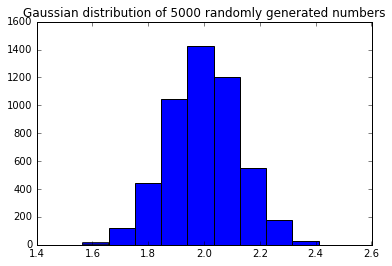

In [228]:
# Plot data
plt.hist(data)
plt.title("Gaussian distribution of 5000 randomly generated numbers")
plt.show()

## Part 4: Random networks